# KaggleDays Meetup Ariana2020 Competition

---
by Skander Chouchene\
This notebook is my entry in the KaggleDays competition that took place in Ariana - Tunisia in February 2020.\
I ranked 8/32.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns  #advanced visualization library
import requests, zipfile, io
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/My Drive/KaggleDays/train.csv')
test = pd.read_csv('/content/drive/My Drive/KaggleDays/test.csv')
sample_submission = pd.read_csv('/content/drive/My Drive/KaggleDays/SampleSubmission.csv')

In [ ]:
test = pd.read_csv('/content/drive/My Drive/KaggleDays/test.csv')


In [ ]:
test.shape

(83210, 15)

In [ ]:
all_data = pd.concat((train, test)).reset_index(drop = True)


In [ ]:
new=train.groupby('country')['price'].agg({'price_per_country':'mean'})
all_data = pd.merge(all_data,new,how='left',left_on='country',right_on='country')

new=train.groupby('province')['price'].agg({'price_per_province':'mean'})
all_data = pd.merge(all_data,new,how='left',left_on='province',right_on='province')

new=train.groupby('variety')['price'].agg({'price_per_variety':'mean'})
all_data = pd.merge(all_data,new,how='left',left_on='variety',right_on='variety')


new=train.groupby('winery')['price'].agg({'price_per_winery':'mean'})
all_data = pd.merge(all_data,new,how='left',left_on='winery',right_on='winery')

In [ ]:
train.shape

(175000, 14)

In [ ]:
missi

In [ ]:
train.head()

,country,description,designation,id,index,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_per_country,price_per_province,price_per_variety,price_per_winery
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,32027,NaN,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,26.060501,22.461613,24.285346,18.969697
1,France,"A solid, chunky wine, with a structure that is...",NaN,71079,NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,43.367316,40.651991,48.408807,28.000000
2,France,"This is powerful and concentrated, with the hi...",NaN,32440,NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,43.367316,40.651991,48.408807,135.000000
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,124405,NaN,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,35.153079,37.268083,30.287336,38.294118
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,33649,NaN,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,35.153079,30.977910,18.263484,28.457447


In [ ]:
europe=['Bosnia and Herzegovina', 'Slovakia', 'Armenia', 'Lithuania', 'England', 'Cyprus', 'Macedonia', 'Serbia', 'Czech Republic', 'Ukraine', 'Luxembourg', 'Switzerland', 'Georgia', 'Moldova','Italy', 'France', 'Spain', 'Portugal', 'Austria', 'Germany', 'Greece', 'Hungary', 'Romania', 'Bulgaria', 'Slovenia', 'Turkey' , 'Croatia'  ]
north_america=['US', 'Canada', 'Mexico']
south_america=['Peru', 'Brazil', 'Chile', 'Argentina', 'Uruguay',  ]
africa=['Morocco', 'South Africa']
asia=['China', 'Japan', 'South Korea', 'Lebanon', 'India', 'Australia', 'New Zealand', 'Israel' ]

co=train.country
a50=a40=[0 for i in range(len(co))]
a40=[0 for i in range(len(co))]
a30=[0 for i in range(len(co))]
a20=[0 for i in range(len(co))]
a10=[0 for i in range(len(co))]
for i in range(len(countries)):
  if co[i]in europe:
    a40[i]=1
  if co[i]in north_america:
    a30[i]=1
  if co[i]in south_america:
    a20[i]=1
  if co[i]in africa:
    a10[i]=1
  if co[i]in asia:
    a50[i]=1
train["europe"]=a40
train["north_america"]=a30
train["south_america"]=a20
train["africa"]=a10
train["asia"]=a50


In [ ]:
countries=train.country.unique()
countries

array(['Portugal', 'France', 'US', 'Spain', 'Italy', 'Chile', 'Argentina',
       'Australia', 'Greece', 'Austria', 'New Zealand', 'South Africa',
       'Slovenia', 'Germany', 'Bulgaria', 'Romania', 'Canada', 'Israel',
       'Moldova', 'England', 'India', 'Bosnia and Herzegovina', 'Cyprus',
       'Croatia', 'Hungary', 'Lithuania', 'Brazil', nan, 'Morocco',
       'Mexico', 'China', 'Uruguay', 'Turkey', 'Ukraine', 'Lebanon',
       'South Korea', 'Georgia', 'Peru', 'Japan', 'Switzerland',
       'Macedonia', 'Luxembourg', 'Czech Republic', 'Serbia', 'Slovakia',
       'Armenia'], dtype=object)

In [ ]:
mc=[]
for i in range(len(countries)):
  m=train[train["country"]==countries[i]].price.mean()
  mc.append(m)

In [ ]:
mc[14]

13.136986301369863

In [ ]:
cat40=[]
cat30=[]
cat20=[]
cat10=[]

for i in range(len(countries)):
  if mc[i]>40:
    cat40.append(countries[i])
  if mc[i]>30 and mc[i]<40:
    cat30.append(countries[i])
  if mc[i]>20 and mc[i]<30:
    cat20.append(countries[i])
  if mc[i]>10 and mc[i]<20:
    cat10.append(countries[i])


In [ ]:
cat40

['France', 'Germany', 'England', 'Hungary', 'Switzerland']

In [ ]:
co=train.country
a40=[0 for i in range(len(co))]
a30=[0 for i in range(len(co))]
a20=[0 for i in range(len(co))]
a10=[0 for i in range(len(co))]
for i in range(len(countries)):
  if co[i]in cat40:
    a40[i]=1
  if co[i]in cat30:
    a30[i]=1
  if co[i]in cat20:
    a20[i]=1
  if co[i]in cat10:
    a10[i]=1


In [ ]:
len(a10)

175000

In [ ]:
train["a40"]=a40
train["a30"]=a30
train["a20"]=a20
train["a10"]=a10

In [ ]:
train.variety.nunique()

706

In [ ]:
varieties=train.variety.unique()

mc=[]
for i in range(len(varieties)):
  m=train[train["variety"]==varieties[i]].price.mean()
  mc.append(m)

dat40=[]
dat30=[]
dat20=[]
dat10=[]

for i in range(len(varieties)):
  if mc[i]>40:
    dat40.append(varieties[i])
  if mc[i]>30 and mc[i]<40:
    dat30.append(varieties[i])
  if mc[i]>20 and mc[i]<30:
    dat20.append(varieties[i])
  if mc[i]>10 and mc[i]<20:
    dat10.append(varieties[i])


co=train.variety
a40=[0 for i in range(len(co))]
a30=[0 for i in range(len(co))]
a20=[0 for i in range(len(co))]
a10=[0 for i in range(len(co))]
for i in range(len(varieties)):
  if co[i]in dat40:
    a40[i]=1
  if co[i]in dat30:
    a30[i]=1
  if co[i]in dat20:
    a20[i]=1
  if co[i]in dat10:
    a10[i]=1
train["b40"]=a40
train["b30"]=a30
train["b20"]=a20
train["b10"]=a10

In [ ]:
test.shape

(83210, 19)

In [ ]:
wineries=train.winery.unique()
countries
mc=[]
for i in range(len(wineries)):
  m=train[train["winery"]==wineries[i]].price.mean()
  mc.append(m)

cat40=[]
cat30=[]
cat20=[]
cat10=[]

for i in range(len(wineries)):
  if mc[i]>40:
    cat40.append(wineries[i])
  if mc[i]>30 and mc[i]<40:
    cat30.append(wineries[i])
  if mc[i]>20 and mc[i]<30:
    cat20.append(wineries[i])
  if mc[i]>10 and mc[i]<20:
    cat10.append(wineries[i])


co=train.winery
a40=[0 for i in range(len(co))]
a30=[0 for i in range(len(co))]
a20=[0 for i in range(len(co))]
a10=[0 for i in range(len(co))]
for i in range(len(wineries)):
  if co[i]in cat40:
    a40[i]=1
  if co[i]in cat30:
    a30[i]=1
  if co[i]in cat20:
    a20[i]=1
  if co[i]in cat10:
    a10[i]=1
train["c40"]=a40
train["c30"]=a30
train["c20"]=a20
train["c10"]=a10

In [ ]:
designations=train.designation.unique()
countries
mc=[]
for i in range(len(designations)):
  m=train[train["winery"]==designations[i]].price.mean()
  mc.append(m)

cat40=[]
cat30=[]
cat20=[]
cat10=[]

for i in range(len(designations)):
  if mc[i]>40:
    cat40.append(designations[i])
  if mc[i]>30 and mc[i]<40:
    cat30.append(designations[i])
  if mc[i]>20 and mc[i]<30:
    cat20.append(designations[i])
  if mc[i]>10 and mc[i]<20:
    cat10.append(designations[i])


co=train.designation
a40=[0 for i in range(len(co))]
a30=[0 for i in range(len(co))]
a20=[0 for i in range(len(co))]
a10=[0 for i in range(len(co))]
for i in range(len(designations)):
  if co[i]in cat40:
    a40[i]=1
  if co[i]in cat30:
    a30[i]=1
  if co[i]in cat20:
    a20[i]=1
  if co[i]in cat10:
    a10[i]=1
train["d40"]=a40
train["d30"]=a30
train["d20"]=a20
train["d10"]=a10

In [ ]:
train.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id,a40,a30,a20,a10,b40,b30,b20,b10,c40,c30,c20,c10
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027,0,0,1,0,0,0,1,0,0,0,0,1
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079,1,0,0,0,1,0,0,0,0,0,1,0
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440,1,0,0,0,1,0,0,0,1,0,0,0
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405,0,1,0,0,0,1,0,0,0,1,0,0
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649,0,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
sns.boxplot(y='price', x='southern_europe', data=train)

In [ ]:
missing_percentage=(train.isna().sum()/len(train)).sort_values(ascending=False)
missing_percentage

In [ ]:
trainid=train.id
train=train.drop(["id","title","region_2","taster_twitter_handle"],axis=1)


In [ ]:
train=train.drop("taster_name",axis=1)

In [ ]:
#train[["country","description","designation","province","region_1","region_2","taster_name","title","variety","winery"]]=train[["country","description","designation","province","region_1","variety","winery"]].astype(str)
train["description"]=train["description"].astype(str)

In [ ]:
train.country=train.country.dropna()
train.province=train.province.dropna()
train.variety=train.variety.dropna()

In [ ]:
train.region_1.value_counts()

Napa Valley                              7213
Columbia Valley (WA)                     6196
Russian River Valley                     4481
California                               4183
Mendoza                                  3975
                                         ... 
Saint-Chinian-Roquebrun                     1
Recioto della Valpolicella Valpantena       1
Texoma                                      1
Côtes du Roussillon Villages Caramany       1
Côtes de Frontonnais                        1
Name: region_1, Length: 1278, dtype: int64

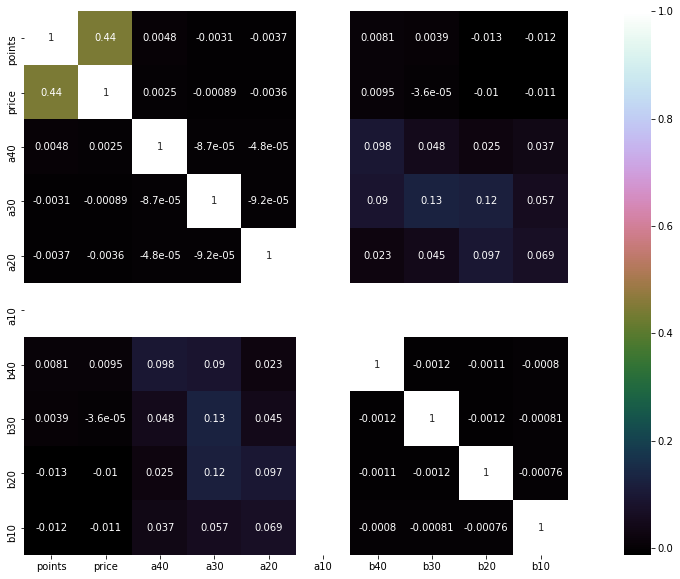

In [ ]:
corr_mat=train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

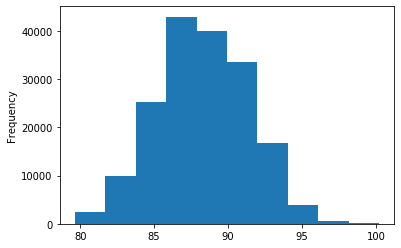

In [ ]:
train.points.plot(kind="hist")

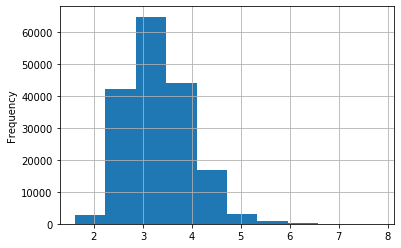

In [ ]:
x=np.log1p(train.price)
x.plot(kind='hist',bins=10,grid=True)


In [ ]:
train.price=np.log1p(train.price)

In [ ]:
train.price.head()

0     20.0
1     28.0
2    130.0
3     34.0
4     24.0
Name: price, dtype: float64

# **Text Mining on Description**

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
des=train.description
type(des[0])

str

In [ ]:
len(des)

175000

In [ ]:
des.head()

0    This is a fine rich balanced wine. It has ripe...
1    A solid, chunky wine, with a structure that is...
2    This is powerful and concentrated, with the hi...
3    Rich, ripe and oaky, this Petite Sirah charms ...
4    This wine is a unique in the state blend and f...
Name: description, dtype: object

In [ ]:
from nltk.tokenize import  word_tokenize 

list_text = [des[i] for i in range(len(des))]
print(list_text[:10])


["This is a fine rich balanced wine. It has ripe fruits that suggest black currants, blackberries and a tight, stalky, mineral element. At the same time, it's generous, full of juicy acidity to contrast with the dusty tannin layer that keeps it all together. Drink now.", 'A solid, chunky wine, with a structure that is full of corners and edges. The tannins are in a dusty, chewy style, balancing with the fresh black fig and sweet plum juice flavors. Rich and concentrated, the wine needs to age.', 'This is powerful and concentrated, with the high proportion of Cabernet Sauvignon in the blend standing out firmly. It is dark, rich, packed with ripe black fruits and sweet tannins. Drink from 2018.', 'Rich, ripe and oaky, this Petite Sirah charms with flashy blackberry, cherry and dark chocolate flavors that are opulent through the long finish. The vineyard is in the Los Alamos region.', "This wine is a unique in the state blend and features Cinsault (35%), Grenache (35%) and Mourvèdre. Pale

In [ ]:
print(list_text[:100])

["This is a fine rich balanced wine. It has ripe fruits that suggest black currants, blackberries and a tight, stalky, mineral element. At the same time, it's generous, full of juicy acidity to contrast with the dusty tannin layer that keeps it all together. Drink now.", 'A solid, chunky wine, with a structure that is full of corners and edges. The tannins are in a dusty, chewy style, balancing with the fresh black fig and sweet plum juice flavors. Rich and concentrated, the wine needs to age.', 'This is powerful and concentrated, with the high proportion of Cabernet Sauvignon in the blend standing out firmly. It is dark, rich, packed with ripe black fruits and sweet tannins. Drink from 2018.', 'Rich, ripe and oaky, this Petite Sirah charms with flashy blackberry, cherry and dark chocolate flavors that are opulent through the long finish. The vineyard is in the Los Alamos region.', "This wine is a unique in the state blend and features Cinsault (35%), Grenache (35%) and Mourvèdre. Pale

In [ ]:
##################Tokenising
word_tokens=[]
for i in range(len(list_text)):
    a=list_text[i]
    l=word_tokenize(a)
    word_tokens.append(l)
print(word_tokens[:10])


[['This', 'is', 'a', 'fine', 'rich', 'balanced', 'wine', '.', 'It', 'has', 'ripe', 'fruits', 'that', 'suggest', 'black', 'currants', ',', 'blackberries', 'and', 'a', 'tight', ',', 'stalky', ',', 'mineral', 'element', '.', 'At', 'the', 'same', 'time', ',', 'it', "'s", 'generous', ',', 'full', 'of', 'juicy', 'acidity', 'to', 'contrast', 'with', 'the', 'dusty', 'tannin', 'layer', 'that', 'keeps', 'it', 'all', 'together', '.', 'Drink', 'now', '.'], ['A', 'solid', ',', 'chunky', 'wine', ',', 'with', 'a', 'structure', 'that', 'is', 'full', 'of', 'corners', 'and', 'edges', '.', 'The', 'tannins', 'are', 'in', 'a', 'dusty', ',', 'chewy', 'style', ',', 'balancing', 'with', 'the', 'fresh', 'black', 'fig', 'and', 'sweet', 'plum', 'juice', 'flavors', '.', 'Rich', 'and', 'concentrated', ',', 'the', 'wine', 'needs', 'to', 'age', '.'], ['This', 'is', 'powerful', 'and', 'concentrated', ',', 'with', 'the', 'high', 'proportion', 'of', 'Cabernet', 'Sauvignon', 'in', 'the', 'blend', 'standing', 'out', 'fir

In [ ]:
#Stop WOrds
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) ##Selecting the stop words we want

##########################Update with your own stop words
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]) 
print(len(stop_words))
print(stop_words)



1199
{'om', 'regardless', 'under', 'hereafter', 'kg', 'right', 'thereof', 'maybe', 'whether', 'usually', 'fu', 'thorough', "t's", 'please', 'E', 'those', "what's", 'eu', 'different', 'nowhere', 'outside', 'eg', 'quickly', 'present', 't1', 'interest', 'S', 'thickv', 'truly', 'oa', 'currently', 'kept', 'substantially', 'definitely', 'ea', 'added', 'na', 'thanks', 'last', 'ltd', 'became', 'wouldn', 'sub', 'ej', 'gives', 'indeed', 'looking', 'i2', 'then', 'um', 'what', 'ps', 'hardly', 'a1', 'volumtype', 'aren', 'probably', 'let', 'therefore', 'two', 'mainly', 'obtained', 'which', '.', 'came', 'system', 'largely', 'appear', 'whither', 'youd', "won't", "it'll", 'mt', 'bj', 'although', 'took', 'ct', 'whereafter', 'ii', 'need', 'youre', 'he', "she'd", 'consider', 'cd', 'know', 'obviously', 'ho', 'lt', 's2', 'up', 'that', "doesn't", 'arise', 'you', 'be', 'near', 'the', 'ys', 'dd', 'respectively', 'si', 'everybody', 'eight', 'ref', 'ju', 'itd', 'pd', 'Q', 'wouldnt', 'world', 'ne', 'specify', 'ca

In [ ]:
#filtering
filtered = []
for i in range(len(word_tokens)):
  a=[]
  for j in range(len(word_tokens[i])):
    b=str(word_tokens[i][j])
    if b not in stop_words:
      a.append(word_tokens[i][j])
  filtered.append(a)
print(filtered[0])


['This', 'fine', 'rich', 'balanced', 'wine', 'It', 'ripe', 'fruits', 'black', 'currants', 'blackberries', 'tight', 'stalky', 'mineral', 'element', 'At', 'time', "'s", 'generous', 'juicy', 'acidity', 'contrast', 'dusty', 'tannin', 'layer', 'Drink']


In [ ]:
len(filtered)

175000

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer()
dtm = pd.DataFrame(countvec1.fit_transform(des).toarray(), columns=countvec1.get_feature_names(), index=None)


In [ ]:
train.head()

,country,description,designation,id,index,points,price,price_per_country_x,price_per_province_x,price_per_variety_x,price_per_winery_x,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_per_country_y,price_per_province_y,price_per_variety_y,price_per_winery_y,europe,north_america,south_america,africa,asia,a40,a30,a20,a10,b40,b30,b20,b10
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,32027,NaN,88.870874,20.0,26.060501,22.461613,24.285346,18.969697,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,26.060501,22.461613,24.285346,18.969697,1,0,0,0,0,0,0,1,0,0,0,1,0
1,France,"A solid, chunky wine, with a structure that is...",NaN,71079,NaN,88.041695,28.0,43.367316,40.651991,48.408807,28.000000,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,43.367316,40.651991,48.408807,28.000000,1,0,0,0,0,1,0,0,0,1,0,0,0
2,France,"This is powerful and concentrated, with the hi...",NaN,32440,NaN,94.085021,130.0,43.367316,40.651991,48.408807,135.000000,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,43.367316,40.651991,48.408807,135.000000,1,0,0,0,0,1,0,0,0,1,0,0,0
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,124405,NaN,89.869797,34.0,35.153079,37.268083,30.287336,38.294118,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,35.153079,37.268083,30.287336,38.294118,0,1,0,0,0,0,1,0,0,0,1,0,0
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,33649,NaN,89.017651,24.0,35.153079,30.977910,18.263484,28.457447,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,35.153079,30.977910,18.263484,28.457447,0,1,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
train.head()

,country,description,designation,id,index,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,price_per_country,price_per_province,price_per_variety,price_per_winery,europe,north_america,south_america,africa,asia,a40,a30,a20,a10,b40,b30,b20,b10
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,32027,NaN,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,26.060501,22.461613,24.285346,18.969697,1,0,0,0,0,0,0,1,0,0,0,1,0
1,France,"A solid, chunky wine, with a structure that is...",NaN,71079,NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,43.367316,40.651991,48.408807,28.000000,1,0,0,0,0,1,0,0,0,1,0,0,0
2,France,"This is powerful and concentrated, with the hi...",NaN,32440,NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,43.367316,40.651991,48.408807,135.000000,1,0,0,0,0,1,0,0,0,1,0,0,0
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,124405,NaN,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,35.153079,37.268083,30.287336,38.294118,0,1,0,0,0,0,1,0,0,0,1,0,0
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,33649,NaN,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,35.153079,30.977910,18.263484,28.457447,0,1,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
Y=train.price


In [ ]:
train=train[["points","a40","a30","a20","a10","b40","b30","b20","b10",'europe','north_america','south_america','asia','africa','price_per_country','price_per_province','price_per_variety','price_per_winery']]

In [ ]:
train.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id,europe,north_america,south_america,africa,asia,a40,a30,a20,a10,b40,b30,b20,b10,price_per_country,price_per_province,price_per_variety,price_per_winery
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,3.044522,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027,1,0,0,0,0,0,0,1,0,0,0,1,0,26.060501,22.461613,24.285346,18.969697
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,3.367296,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079,1,0,0,0,0,1,0,0,0,1,0,0,0,43.367316,40.651991,48.408807,28.000000
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,4.875197,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440,1,0,0,0,0,1,0,0,0,1,0,0,0,43.367316,40.651991,48.408807,135.000000
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,3.555348,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405,0,1,0,0,0,0,1,0,0,0,1,0,0,35.153079,37.268083,30.287336,38.294118
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,3.218876,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649,0,1,0,0,0,0,1,0,0,0,0,0,1,35.153079,30.977910,18.263484,28.457447


In [ ]:
train_X, val_X, train_y, val_y = train_test_split(train,Y , test_size=0.20, random_state=4)

# Let's try Lasso

In [ ]:
x=train_X.tolist()
x=np.array(x)
x=x.reshape(-1,1)
train_X=x

In [ ]:
x=val_X.tolist()
x=np.array(x)
x=x.reshape(-1,1)
val_X=x

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.05)
clf.fit(train_X,train_y)
val_pred = clf.predict(val_X)
val_mae = np.sqrt(mean_squared_error(val_pred, val_y))
print(val_mae)

0.505761599821792


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=8,
                 reg_alpha=0.0006,
                 min_child_weight=1.5,
                 n_estimators=500)                                                               
xgb_model.fit(train_X,train_y)
val_pred_xgb = xgb_model.predict(val_X)
val_mae_xgb = np.sqrt(mean_squared_error(val_pred_xgb, val_y))
print(val_mae_xgb)

[16:06:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.28560425442158793


In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=10,
                 min_child_weight=1.5,
                 n_estimators=500,                                                                   
                 reg_alpha=0.0006,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
lgb_model.fit(train_X,train_y)
val_pred_lgb = lgb_model.predict(val_X)
val_mae_lgb = np.sqrt(mean_squared_error(val_pred_lgb, val_y))
print(val_mae_lgb)

0.29954252161266487


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=8, random_state=0)
regr.fit(train_X,train_y)
val_pred_rf = regr.predict(val_X)
val_mae_rf = np.sqrt(mean_squared_error(val_pred_rf, val_y))
print(val_mae_rf)

In [ ]:
ids=test["id"]


In [ ]:
missing_percentage=(test.isna().sum()/len(test)).sort_values(ascending=False)
missing_percentage

price                    1.000000
taster_twitter_handle    0.647050
taster_name              0.627809
region_2                 0.572143
title                    0.533878
designation              0.298330
region_1                 0.166843
province                 0.000204
country                  0.000204
id                       0.000000
winery                   0.000000
variety                  0.000000
points                   0.000000
description              0.000000
index                    0.000000
dtype: float64

In [ ]:
co=test.country.tolist()
a40=[0 for i in range(len(co))]
a30=[0 for i in range(len(co))]
a20=[0 for i in range(len(co))]
a10=[0 for i in range(len(co))]
for i in range(len(countries)):
  if co[i]in cat40:
    a40[i]=1
  if co[i]in cat30:
    a30[i]=1
  if co[i]in cat20:
    a20[i]=1
  if co[i]in cat10:
    a10[i]=1
test["a40"]=a40
test["a30"]=a30
test["a20"]=a20
test["a10"]=a10

In [ ]:
co=test.variety.tolist()
a40=[0 for i in range(len(co))]
a30=[0 for i in range(len(co))]
a20=[0 for i in range(len(co))]
a10=[0 for i in range(len(co))]
for i in range(len(varieties)):
  if co[i]in dat40:
    a40[i]=1
  if co[i]in dat30:
    a30[i]=1
  if co[i]in dat20:
    a20[i]=1
  if co[i]in dat10:
    a10[i]=1
test["b40"]=a40
test["b30"]=a30
test["b20"]=a20
test["b10"]=a10

In [ ]:
co=test.winery
a40=[0 for i in range(len(co))]
a30=[0 for i in range(len(co))]
a20=[0 for i in range(len(co))]
a10=[0 for i in range(len(co))]
for i in range(len(wineries)):
  if co[i]in cat40:
    a40[i]=1
  if co[i]in cat30:
    a30[i]=1
  if co[i]in cat20:
    a20[i]=1
  if co[i]in cat10:
    a10[i]=1
test["c40"]=a40
test["c30"]=a30
test["c20"]=a20
test["c10"]=a10

In [ ]:
co=test.country.tolist()
a50=a40=[0 for i in range(len(co))]
a40=[0 for i in range(len(co))]
a30=[0 for i in range(len(co))]
a20=[0 for i in range(len(co))]
a10=[0 for i in range(len(co))]
for i in range(len(countries)):
  if co[i]in europe:
    a40[i]=1
  if co[i]in north_america:
    a30[i]=1
  if co[i]in south_america:
    a20[i]=1
  if co[i]in africa:
    a10[i]=1
  if co[i]in asia:
    a50[i]=1
test["europe"]=a40
test["north_america"]=a30
test["south_america"]=a20
test["africa"]=a10
test["asia"]=a50

In [ ]:
test=test[["points","a40","a30","a20","a10","b40","b30","b20","b10",'europe','north_america','south_america','asia','africa','price_per_country','price_per_province','price_per_variety','price_per_winery']]

In [ ]:
x=test.tolist()
x=np.array(x)
x=x.reshape(-1,1)
test=x

In [ ]:
# make predictions which we will submit. 
test_preds = clf.predict(test)

# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.
output = pd.DataFrame({'id': ids, 'price': np.expm1(test_preds)})
output.to_csv('/content/drive/My Drive/KaggleDays/sub_lasso.csv', index=False)

In [ ]:
# make predictions which we will submit. 
test_preds_lgb = lgb_model.predict(test)

# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.
output = pd.DataFrame({'id': ids, 'price': np.expm1(test_preds_lgb)})
output.to_csv('/content/drive/My Drive/KaggleDays/sub_lgb.csv', index=False)

In [ ]:
# make predictions which we will submit. 
test_preds_xgb = xgb_model.predict(test)

# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.
output = pd.DataFrame({'id': ids, 'price': np.expm1(test_preds_xgb)})
output.to_csv('/content/drive/My Drive/KaggleDays/sub_xgb.csv', index=False)

In [ ]:
# make predictions which we will submit. 
test_preds_rf = regr.predict(test)

# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.
output = pd.DataFrame({'id': ids, 'price': np.expm1(test_preds_rf)})
output.to_csv('/content/drive/My Drive/KaggleDays/sub_rf.csv', index=False)

In [ ]:
# make predictions which we will submit. 
test_preds_m5alet = 0.6*test_preds_xgb+0.4*test_preds_lgb

# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.
output = pd.DataFrame({'id': ids, 'price': np.expm1(test_preds_m5alet)})
output.to_csv('/content/drive/My Drive/KaggleDays/m5alet.csv', index=False)